# Imports necesarios

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


# Carga y exploración inicial de datos

El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos diez años, incluyendo si para el día siguiente llovió o no y la cantidad de lluvia en las columnas *RainTomorrow* y *RainfallTomorrow*.

El objetivo es la predicción de estas dos variables en función del resto de las características que se consideren adecuadas.

Tiene una columna *Location* que indica la ciudad y el objetivo es predecir la condición de lluvia en las ciudades de Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport (costa sureste). Pueden considerarse como una única ubicación. Descartar el resto de los datos.

In [ ]:
### Carga datos de dataset

file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

In [ ]:
### Vista de datos

df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [ ]:
### Columnas

df.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [ ]:
### Valores de interés

df.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,145412.000000,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,72728.184393,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,41990.722236,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,36362.750000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,72727.500000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,109093.250000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,145458.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [ ]:
### Información

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

In [ ]:
### Cantidad de valores faltantes

df.isna().sum()

Unnamed: 0              0
Date                    0
Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

# Selección de ciudades de interés

* Sydney
* SydneyAirport
* Canberra
* Melbourne
* MelbourneAirport




In [ ]:
### Generamos un nuevo DataFrame que sólo contiene los datos de las ciudades que nos interesa analizar

ciudades = ['Sydney', 'SydneyAirport', 'Canberra', 'Melbourne', 'MelbourneAirport']
df_sel = df[df['Location'].isin(ciudades)]

In [ ]:
### Características

df_sel.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,15986.000000,15495.000000,15500.000000,15199.000000,14280.000000,14038.000000,14531.000000,15725.000000,15737.000000,15416.000000,15461.000000,15251.000000,15260.000000,13309.000000,13054.000000,15481.000000,15490.000000,15199.000000
mean,49512.619855,11.605221,21.751781,2.303744,4.866828,6.854694,44.417315,16.613672,21.797166,68.903023,51.280577,1018.305836,1016.064239,4.750545,4.746131,15.545953,20.229154,2.302586
std,15172.399796,5.851347,6.053679,7.385992,3.069869,3.842419,14.958027,10.336386,9.518033,15.614788,17.721335,7.400730,7.265386,2.728329,2.589879,5.559295,5.857956,7.385251
min,30176.000000,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,3.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000
25%,34173.250000,7.900000,17.100000,0.000000,2.600000,3.700000,33.000000,9.000000,15.000000,59.000000,39.000000,1013.400000,1011.200000,2.000000,2.000000,11.600000,15.900000,0.000000
50%,47228.500000,11.600000,21.300000,0.000000,4.200000,7.500000,43.000000,15.000000,20.000000,70.000000,51.000000,1018.500000,1016.300000,6.000000,6.000000,15.400000,19.800000,0.000000
75%,66393.750000,15.800000,25.800000,0.800000,6.600000,10.000000,54.000000,22.000000,28.000000,80.000000,62.000000,1023.300000,1021.000000,7.000000,7.000000,19.500000,24.100000,0.800000
max,70391.000000,30.500000,46.800000,119.400000,23.800000,13.900000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,46.100000,119.400000


In [ ]:
### Cantidad de valores faltantes

df_sel.isna().sum()

Unnamed: 0             0
Date                   0
Location               0
MinTemp              491
MaxTemp              486
Rainfall             787
Evaporation         1706
Sunshine            1948
WindGustDir         1457
WindGustSpeed       1455
WindDir9am           695
WindDir3pm           290
WindSpeed9am         261
WindSpeed3pm         249
Humidity9am          570
Humidity3pm          525
Pressure9am          735
Pressure3pm          726
Cloud9am            2677
Cloud3pm            2932
Temp9am              505
Temp3pm              496
RainToday            787
RainTomorrow         787
RainfallTomorrow     787
dtype: int64

In [ ]:
### Eliminamos columna "Unnamed: 0" aparentemente usada como índice en el dataset original

df_sel.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df_sel.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
30167,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,6.0
30168,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,6.6
30169,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,18.8
30170,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,77.4
30171,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,1.6


# Codificación de variables binarias

* *RainToday*
* *RainTomorrow*

(1= Yes ; 0 = No)

In [ ]:
### Codificación de variables binarias

df_sel['RainToday'] = df_sel['RainToday'].map({'Yes': 1, 'No': 0})
df_sel['RainTomorrow'] = df_sel['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Codificación de variables categóricas

Puntos cardinales utilizados en los valores de dirección del viento

* *WindGustDir*
* *WindDir9am*
* *WindDir3pm*

In [ ]:
### Valores posibles

print(f'WindGustDir: {df_sel["WindGustDir"].unique()}')
print(f'WindDir9am: {df_sel["WindDir9am"].unique()}')
print(f'WindDir3pm: {df_sel["WindDir3pm"].unique()}')

WindGustDir: [nan 'SSE' 'ESE' 'ENE' 'NNE' 'NNW' 'WNW' 'W' 'NW' 'SSW' 'NE' 'WSW' 'SE'
 'SW' 'N' 'E' 'S']
WindDir9am: ['S' 'W' 'ESE' 'NNE' 'SSW' 'WNW' 'N' 'SW' 'SE' 'SSE' 'WSW' 'E' nan 'ENE'
 'NW' 'NNW' 'NE']
WindDir3pm: ['SSW' 'E' 'ESE' 'W' 'ENE' 'S' 'SE' 'SSE' 'NE' 'NNE' nan 'NNW' 'NW' 'WNW'
 'N' 'WSW' 'SW']


In [ ]:
### Generamos una codificación propia para los distintos valores de dirección del viento

puntos_cardinales = {'N': 1,
                     'NE': 2,
                     'NW': 3,
                     'NNE': 4,
                     'NNW': 5,
                     'S': 6,
                     'SE': 7,
                     'SW': 8,
                     'SSE': 9,
                     'SSW': 10,
                     'W': 11,
                     'WNW': 12,
                     'WSW': 13,
                     'E': 14,
                     'ENE': 15,
                     'ESE': 16}

In [ ]:
### Codificación de variables categóricas

df_sel['WindGustDir'] = df_sel['WindGustDir'].map(puntos_cardinales)
df_sel['WindDir9am'] = df_sel['WindDir9am'].map(puntos_cardinales)
df_sel['WindDir3pm'] = df_sel['WindDir3pm'].map(puntos_cardinales)

<Axes: >

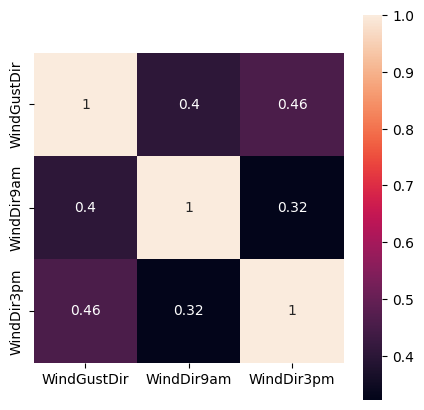

In [ ]:
### Matriz de correlación entre las variables de dirección del viento

corr_matrix = df_sel[['WindGustDir', 'WindDir9am', 'WindDir3pm']].corr(method='pearson')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(corr_matrix, square=True,ax=ax,annot=True)

Las direcciones del viento y de ráfagas no tienen una fuerte correlación entre sí.

Mantendremos las tres variables y para los valores nulos optaremos por completar con la media del conjunto.

In [ ]:
### Completamos valores nulos

df_sel['WindGustDir'].fillna(df_sel['WindGustDir'].mean().round(), inplace=True)
df_sel['WindDir9am'].fillna(df_sel['WindDir9am'].mean().round(), inplace=True)
df_sel['WindDir3pm'].fillna(df_sel['WindDir3pm'].mean().round(), inplace=True)

# Verificación de datos de lluvia faltantes

In [ ]:
### Valores de 'RainfallTomorrow' para días donde 'RainTomorrow' es 0

df_sel[df_sel['RainTomorrow']==0][['RainTomorrow','RainfallTomorrow']].max()

RainTomorrow        0.0
RainfallTomorrow    1.0
dtype: float64

In [ ]:
### Valores de 'RainfallTomorrow' para días donde 'RainTomorrow' es 1

df_sel[df_sel['RainTomorrow']==1][['RainTomorrow','RainfallTomorrow']].min()

RainTomorrow        1.0
RainfallTomorrow    1.2
dtype: float64

Las variables de mayor interés son *RainTomorrow* y *RainfallTomorrow*.

Observamos que estas variables están relacionadas:

* Si *RainfallTomorrow* <= 1.0mm --> *RainTomorrow* = False

* Si *RainfallTomorrow* >= 1.2mm --> *RainTomorrow* = True

Verificamos si los valores faltantes de estas variables corresponden a los mismos registros.

Si no es así, podríamos completar algunos datos utilizando la regla anterior.

In [ ]:
### Verificamos si los registros donde faltan datos en RainTomorrow y RainfallTomorrow son los mismos

result = 'mismos registros'

for i in df_sel[df_sel['RainTomorrow'].isna()].index:
  if not(np.isnan(df_sel.loc[i]['RainfallTomorrow'])):
    result = 'registros distintos'

print(result)



mismos registros


RESULTADO: Al tratarse de los mismos registros no es posible completar datos faltantes.

---

Podemos hacer una búsqueda similar entre las variables *RainTomorrow* y *RainToday*.

Al contar con registros diarios en nuestro dataset, el valor de *RainTomorrow* de un registro se corresponde con el de *RainToday* del registro siguiente.

Verificamos si los datos faltantes pueden completarse usando los valores de los registros siguientes.



In [ ]:
### Verifico si los registros donde faltan datos en RainTomorrow y RainToday corresponden al mismo día

result = 'mismos registros'

for i in df_sel[df_sel['RainTomorrow'].isna()].index:
  if not(np.isnan(df_sel.loc[i+1]['RainToday'])):
    result = 'registros distintos'

print(result)


mismos registros


RESULTADO: La información falta en ambos registros, no es posible completar datos faltantes.

---

Como no es posible completar los registros donde faltan datos de lluvia, estos no se tendrán en cuenta para el análisis.

In [ ]:
### Se eliminan registros

df_sel.dropna(subset=['RainTomorrow','RainToday'], inplace=True)

In [ ]:
### Cantidad de valores faltantes

df_sel.isna().sum()

Date                   0
Location               0
MinTemp                8
MaxTemp                5
Rainfall               0
Evaporation         1681
Sunshine            1931
WindGustDir            0
WindGustSpeed       1434
WindDir9am             0
WindDir3pm             0
WindSpeed9am         260
WindSpeed3pm         249
Humidity9am           86
Humidity3pm           43
Pressure9am          252
Pressure3pm          244
Cloud9am            1900
Cloud3pm            2136
Temp9am               22
Temp3pm               14
RainToday              0
RainTomorrow           0
RainfallTomorrow       0
dtype: int64

#Balance

Verificamos si contamos con un dataset balanceado para el análisis que queremos realizar.

In [ ]:
print(f'Dias sin lluvia: {df_sel["RainTomorrow"][df_sel["RainTomorrow"]==0].count()}')
print(f'Dias con lluvia: {df_sel["RainTomorrow"][df_sel["RainTomorrow"]==1].count()}')

Dias sin lluvia: 11593
Dias con lluvia: 3443


RESULTADO: Considerando los datos de *RainTomorrow* el dataset está desbalanceado.

----

# Verificación de outliers

Para el análisis de outliers dividiremos el dataset en dos partes según la variable *RainTomorrow*.

Se utilizarán gráficos de cajas y decripción de valores máximos y mínimos.

In [ ]:
### Columnas

df_sel.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [ ]:
### Variables a analizar

labels=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainfallTomorrow']

In [ ]:
### División del dataset según 'RainTomorrow'

data0 = df_sel[labels][df_sel['RainTomorrow']==0]
data1 = df_sel[labels][df_sel['RainTomorrow']==1]

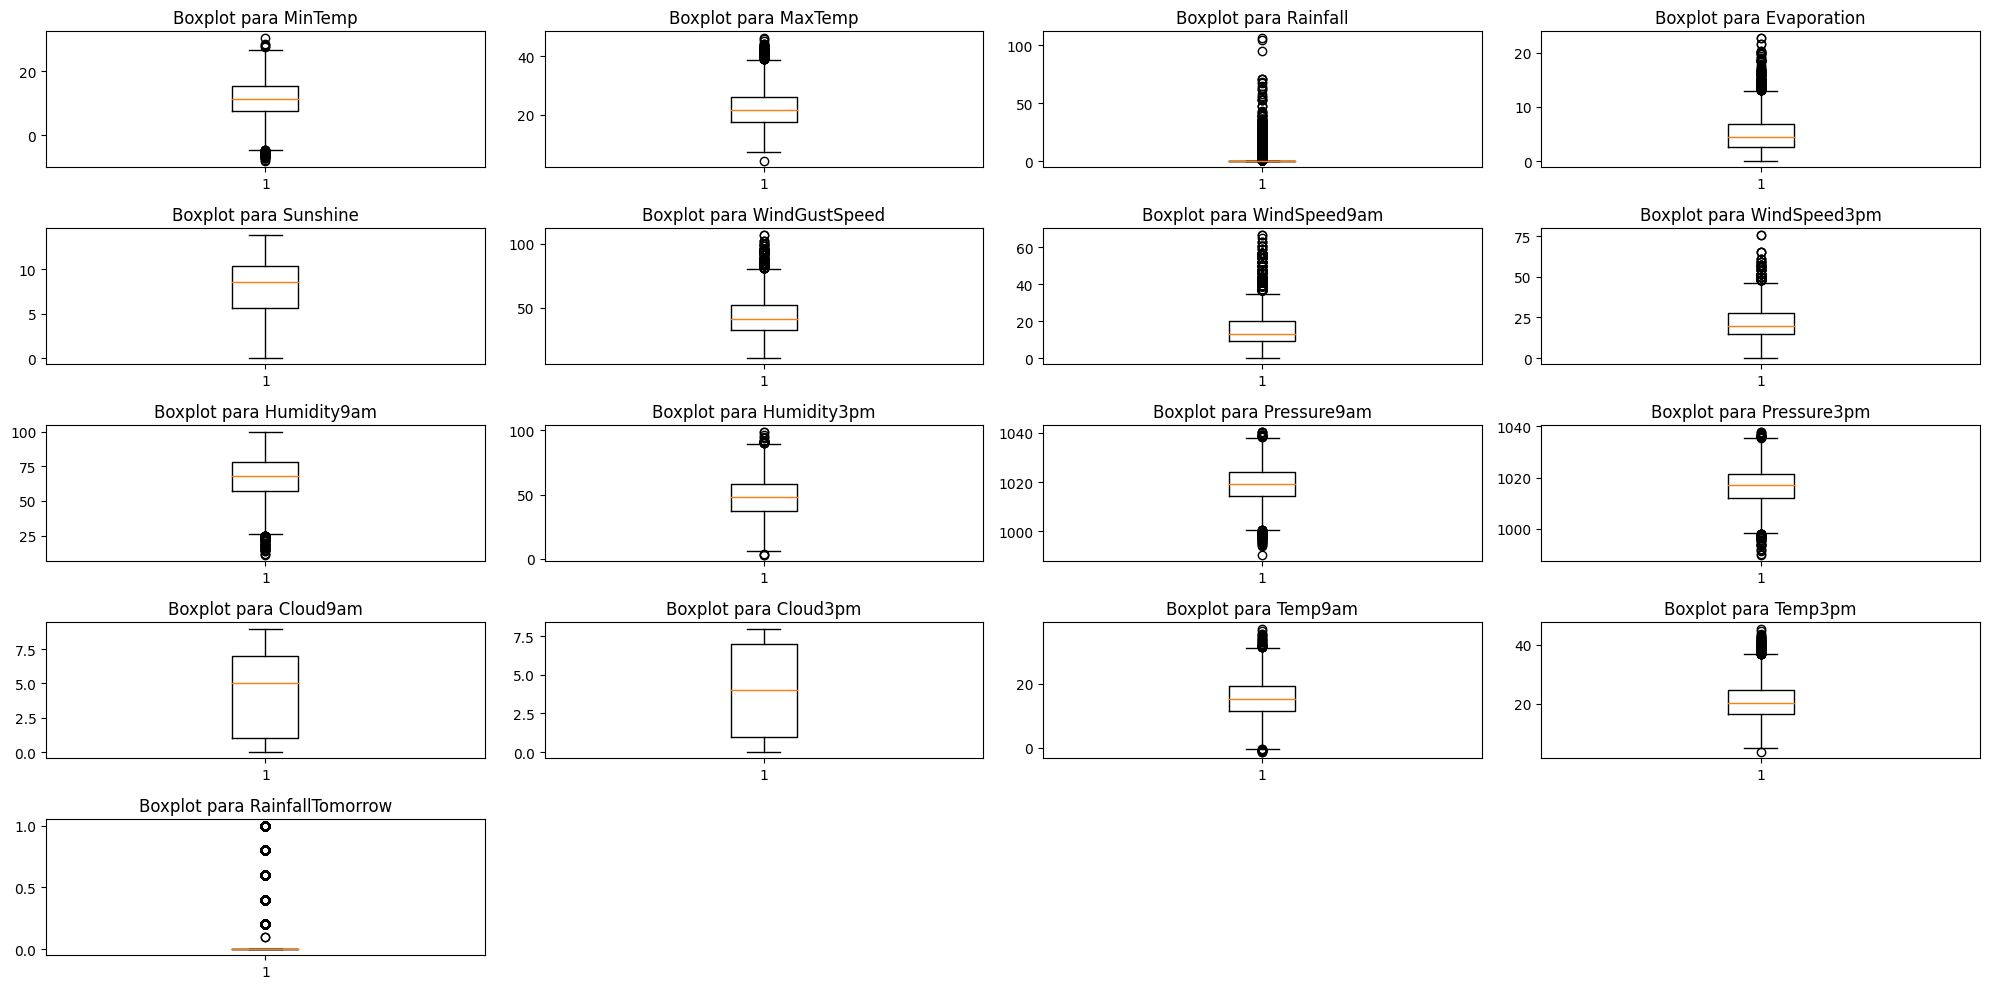

In [ ]:
### Boxplot para 'RainTomorrow' = 0

num_etiquetas = len(labels)
num_columnas = 4
num_filas = (num_etiquetas + num_columnas - 1) // num_columnas # Número de filas necesario para acomodar todos los subplots

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(20, 10))

for i, col in enumerate(labels):
    fila = i // num_columnas # Ubicación de fila y columna en la matriz de subplots, en función del índice
    columna = i % num_columnas

    ax = axes[fila, columna] # Subplot actual
    ax.boxplot(data0[col].dropna())
    ax.set_title(f'Boxplot para {col}')

# Eliminamos subplots vacíos
for i in range(num_etiquetas, num_filas * num_columnas):
    fig.delaxes(axes[i // num_columnas, i % num_columnas])

plt.tight_layout()
plt.show()

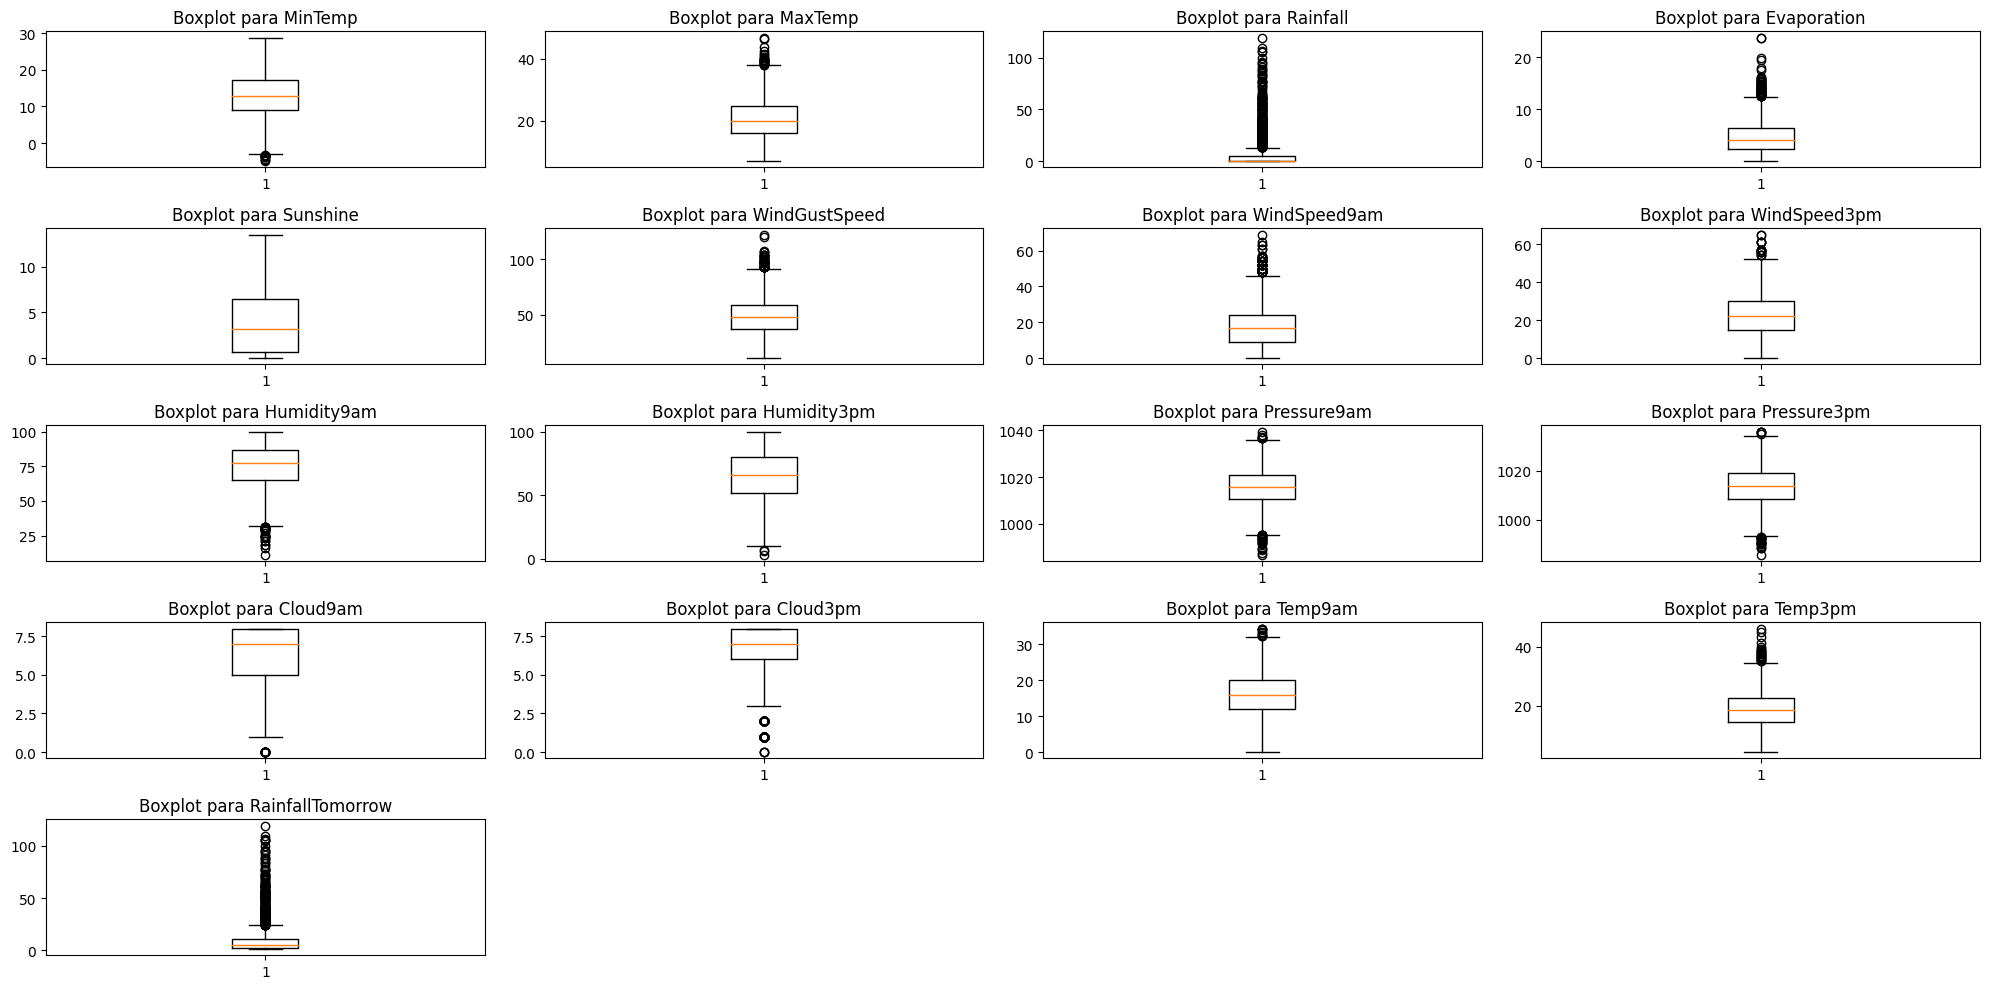

In [ ]:
### Boxplot para 'RainTomorrow' = 1

num_etiquetas = len(labels)
num_columnas = 4
num_filas = (num_etiquetas + num_columnas - 1) // num_columnas # Número de filas necesario para acomodar todos los subplots

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(20, 10))

for i, col in enumerate(labels):
    fila = i // num_columnas # Ubicación de fila y columna en la matriz de subplots, en función del índice
    columna = i % num_columnas

    ax = axes[fila, columna] # Subplot actual
    ax.boxplot(data1[col].dropna())
    ax.set_title(f'Boxplot para {col}')

# Eliminamos subplots vacíos
for i in range(num_etiquetas, num_filas * num_columnas):
    fig.delaxes(axes[i // num_columnas, i % num_columnas])

plt.tight_layout()
plt.show()

In [ ]:
### Valores de interés

df_sel.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
count,15028.000000,15031.000000,15036.000000,13355.000000,13105.000000,15036.000000,13602.000000,15036.000000,15036.000000,14776.000000,...,14993.000000,14784.000000,14792.000000,13136.000000,12900.000000,15014.000000,15022.000000,15036.000000,15036.000000,15036.000000
mean,11.612610,21.803739,2.299601,4.881041,6.907707,7.446994,44.290619,7.581804,8.038242,16.443760,...,51.239645,1018.338400,1016.077778,4.737972,4.735349,15.588770,20.277899,0.232442,0.228984,2.250213
std,5.886335,6.058224,7.404618,3.056038,3.837245,4.330699,14.948251,4.369030,4.538986,10.264783,...,17.757028,7.400836,7.265255,2.731119,2.593540,5.572921,5.861972,0.422403,0.420193,7.318972
min,-8.000000,4.100000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,1.000000,0.000000,...,3.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000,0.000000,0.000000
25%,7.900000,17.200000,0.000000,2.600000,3.800000,4.000000,33.000000,3.000000,5.000000,9.000000,...,39.000000,1013.400000,1011.200000,2.000000,2.000000,11.600000,16.000000,0.000000,0.000000,0.000000
50%,11.600000,21.300000,0.000000,4.200000,7.600000,7.000000,43.000000,8.000000,8.000000,15.000000,...,51.000000,1018.500000,1016.300000,6.000000,6.000000,15.500000,19.800000,0.000000,0.000000,0.000000
75%,15.900000,25.800000,0.800000,6.600000,10.000000,11.000000,54.000000,11.000000,12.000000,22.000000,...,62.000000,1023.300000,1021.000000,7.000000,7.000000,19.600000,24.200000,0.000000,0.000000,0.800000
max,30.500000,46.800000,119.400000,23.800000,13.900000,16.000000,122.000000,16.000000,16.000000,69.000000,...,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,46.100000,1.000000,1.000000,119.400000


Teniendo en cuenta los valores máximos y mínimos para las variables de interés, no consideramos que los outliers representen valores que alteren el resultado del análisis. Por lo tanto, no le daremos un trato particular.

#Selección de características

Utilizando los coeficientes de la matriz de correlacion determinaremos qué carcterísticas podemos eliminar para el posterior análisis.

<Axes: >

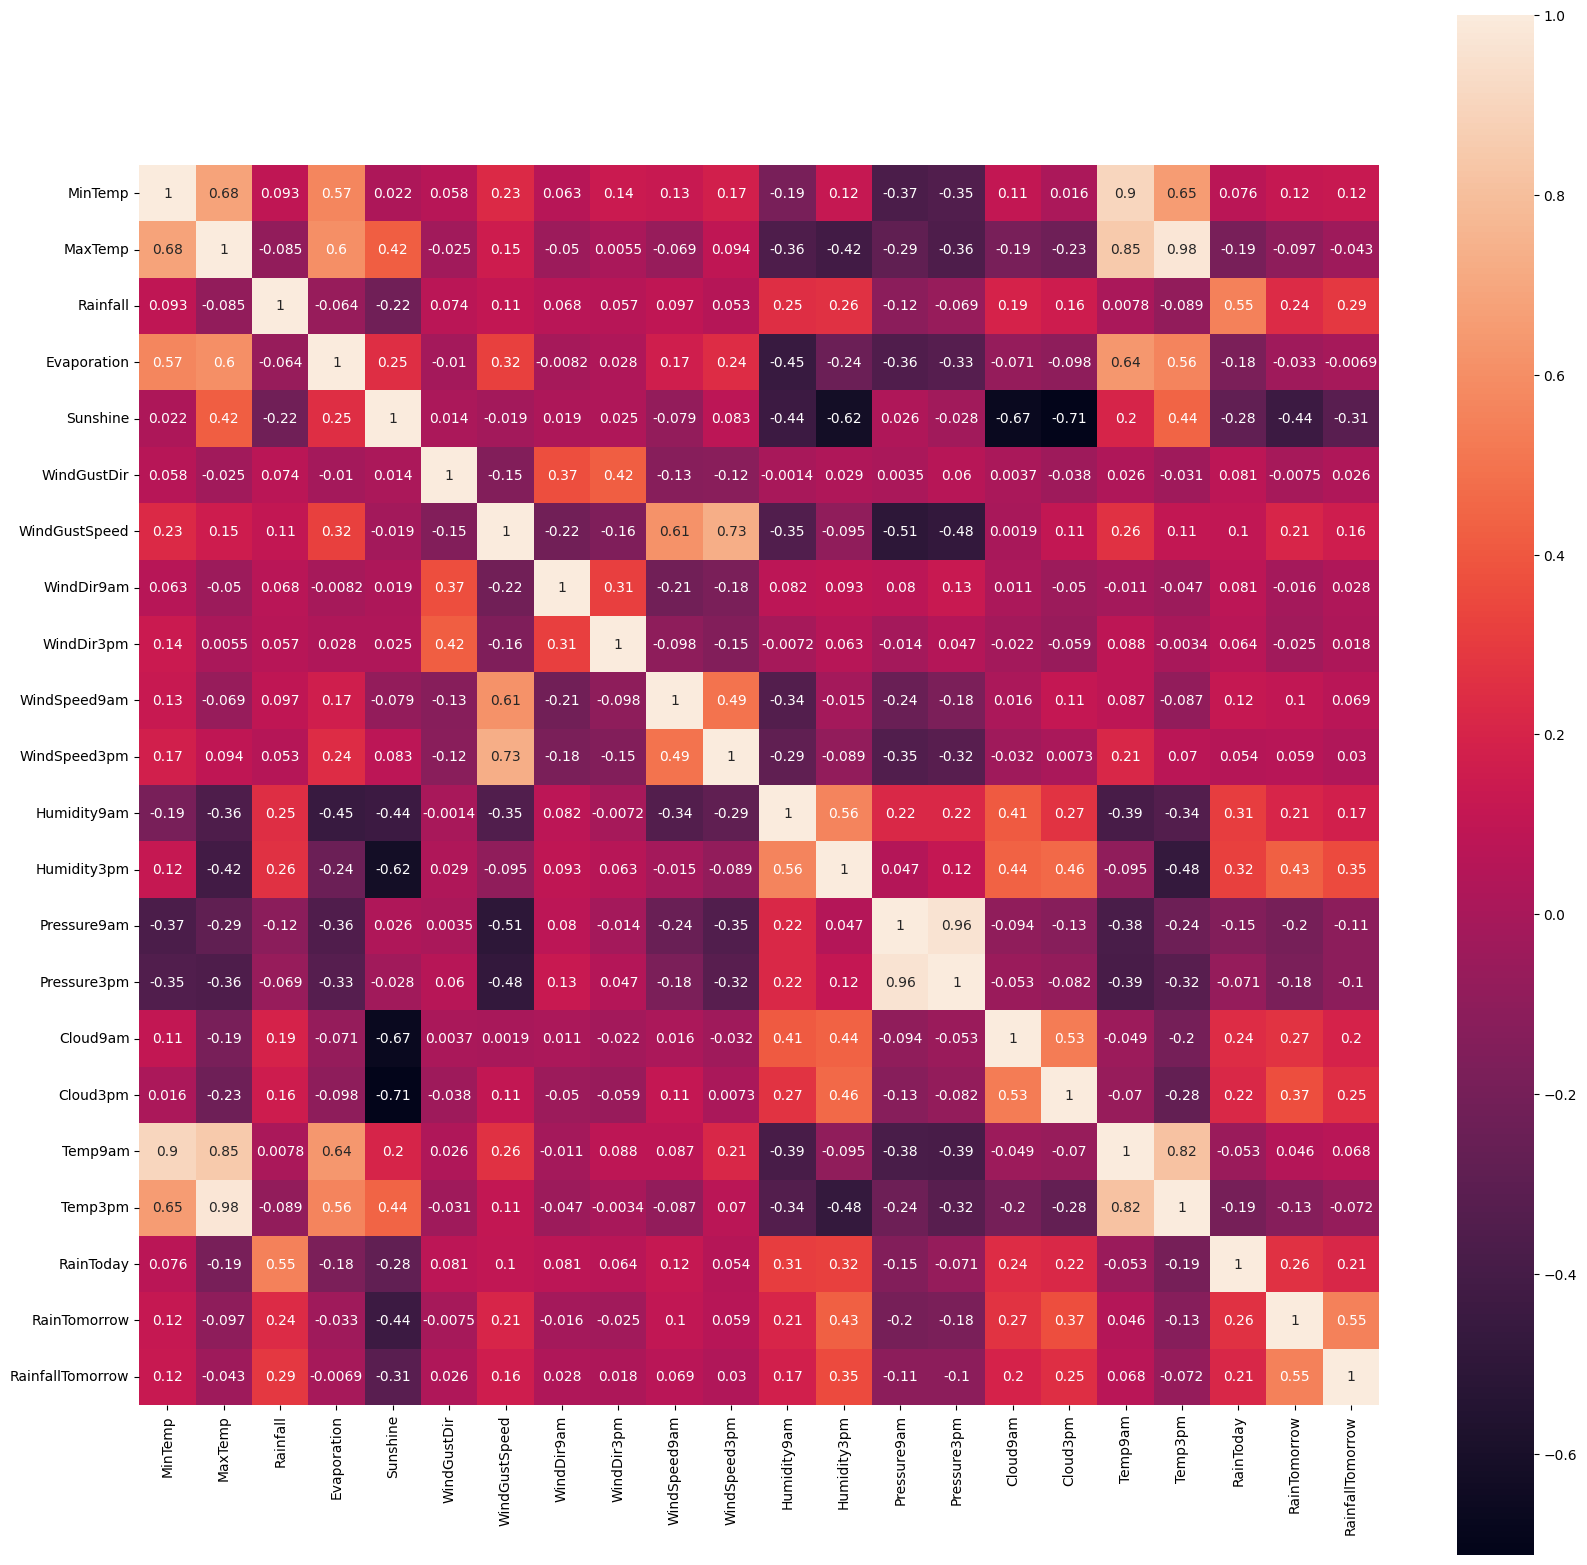

In [ ]:
### Matriz de correlación

corr_matrix = df_sel.drop(columns=['Date', 'Location']).corr(method='pearson')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(corr_matrix, square=True,ax=ax,annot=True)

* En el heatmap anterior se puede observar una fuerte correlación entre los valores de Presión 9am con los de 3am. Para el análisis sería conveniente quedarnos sólo con *Pressure9am*.

* Lo mismo sucede para los valores de Temperatura 9am con Mínima y 3pm con Máxima. Consideramos que es válido trabajar sólo con *MinTemp* y *MaxTemp*.

* **Las velocidades del viento también presentan una correlación, aunque no tan marcada como las variables anteriores. Para nuestro análisis sólo tendremos en cuenta la variable *WindGustSpeed*.**

* **Las mediciones de nubosidad y de humedad están relacionadas con las de radiación solar. Sólo mantendremos la variable *Sunshine*.**


In [ ]:
### Eliminamos las características mencionadas

#df_sel.drop(columns = ['Pressure3pm','Temp9am','Temp3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Cloud9am', 'Cloud3pm', 'Humidity9am', 'Humidity3pm'], inplace = True)
df_sel.drop(columns = ['Temp9am','Temp3pm','Pressure3pm'], inplace = True)


<Axes: >

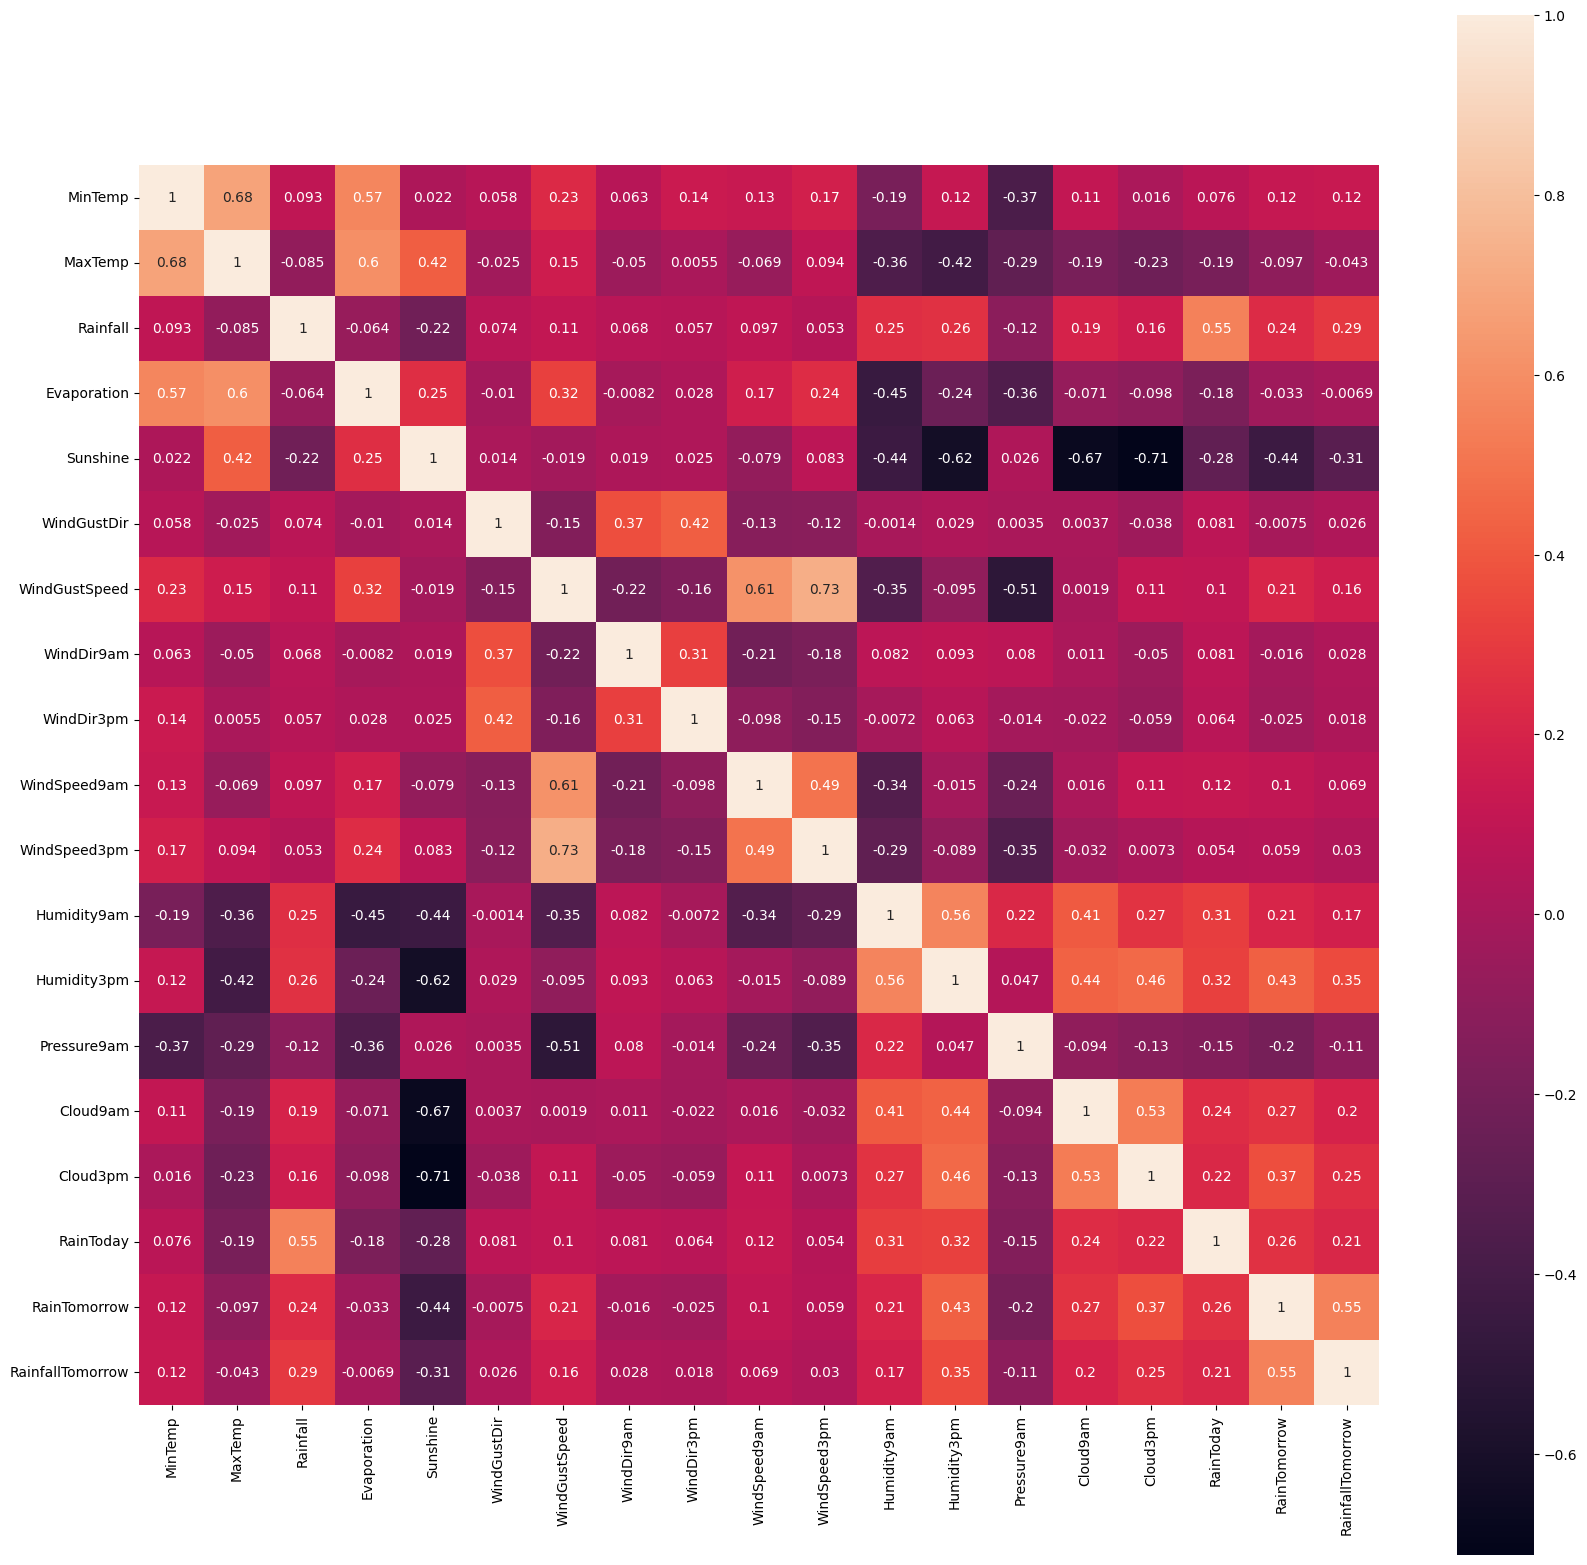

In [ ]:
### Matriz de correlación reducida

corr_matrix = df_sel.drop(columns=['Date', 'Location']).corr(method='pearson')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(corr_matrix, square=True,ax=ax,annot=True)

# Tratamiento de últimos valores faltantes

Para las características seleccionadas se completarán los valores faltantes con la media de cada conjunto.

In [ ]:
### Cantidad de valores faltantes

df_sel.isna().sum()

Date                   0
Location               0
MinTemp                8
MaxTemp                5
Rainfall               0
Evaporation         1681
Sunshine            1931
WindGustDir            0
WindGustSpeed       1434
WindDir9am             0
WindDir3pm             0
WindSpeed9am         260
WindSpeed3pm         249
Humidity9am           86
Humidity3pm           43
Pressure9am          252
Cloud9am            1900
Cloud3pm            2136
RainToday              0
RainTomorrow           0
RainfallTomorrow       0
dtype: int64

In [ ]:
### Completamos valores nulos

df_sel['MinTemp'].fillna(df_sel['MinTemp'].mean(), inplace=True)
df_sel['MaxTemp'].fillna(df_sel['MaxTemp'].mean(), inplace=True)
df_sel['Evaporation'].fillna(df_sel['Evaporation'].mean(), inplace=True)
df_sel['Sunshine'].fillna(df_sel['Sunshine'].mean(), inplace=True)
df_sel['WindGustSpeed'].fillna(df_sel['WindGustSpeed'].mean(), inplace=True)
df_sel['Pressure9am'].fillna(df_sel['Pressure9am'].mean(), inplace=True)
df_sel['WindSpeed9am'].fillna(df_sel['WindSpeed9am'].mean(), inplace=True)
df_sel['WindSpeed3pm'].fillna(df_sel['WindSpeed3pm'].mean(), inplace=True)
df_sel['Humidity9am'].fillna(df_sel['Humidity9am'].mean(), inplace=True)
df_sel['Humidity3pm'].fillna(df_sel['Humidity3pm'].mean(), inplace=True)
#df_sel['Pressure3pm'].fillna(df_sel['Pressure3pm'].mean(), inplace=True)
df_sel['Cloud9am'].fillna(df_sel['Cloud9am'].mean(), inplace=True)
df_sel['Cloud3pm'].fillna(df_sel['Cloud3pm'].mean(), inplace=True)
#df_sel['Temp9am'].fillna(df_sel['Temp9am'].mean(), inplace=True)
#df_sel['Temp3pm'].fillna(df_sel['Temp3pm'].mean(), inplace=True)

In [ ]:
### Cantidad de valores faltantes

df_sel.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Cloud9am            0
Cloud3pm            0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
dtype: int64

# Split del dataset

In [ ]:
### División de los datos en train y test

X = df_sel.drop(columns=['RainfallTomorrow','RainToday','RainTomorrow','Date','Location'])
y = df_sel['RainfallTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2,random_state = 12)

In [ ]:
### Escalado de conjunto X de entrenamiento y test

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train.shape

(12028, 16)

In [ ]:
y_train.shape

(12028, 1)

In [ ]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm'],
      dtype='object')

# Gradiente descendiente

## Funciones

In [ ]:
def gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]

    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))


    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W)
        error_test = y_test - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de test')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W, test_mse

In [ ]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):

    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W

In [ ]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

## Aplicación

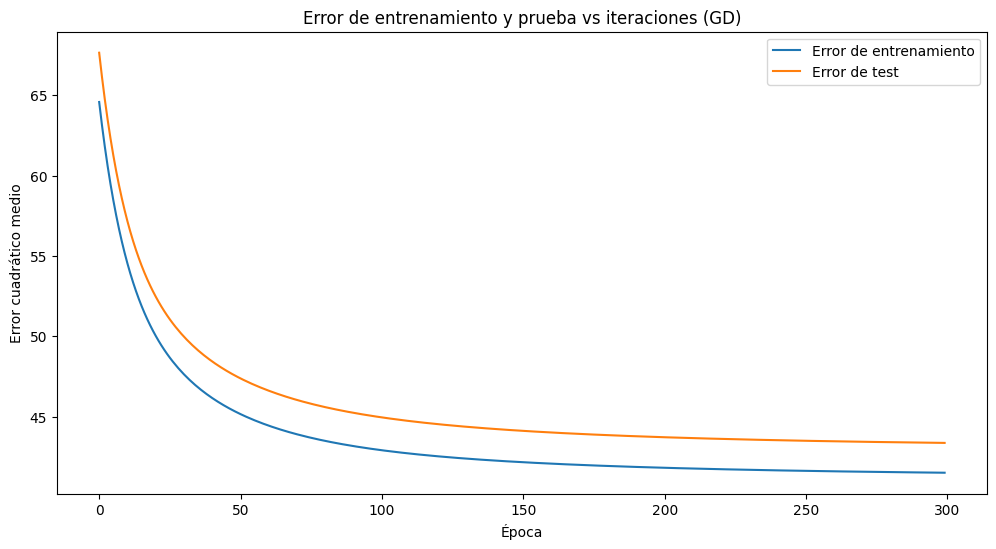

In [ ]:
GD_coef, GD_test_err = gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, epochs=300, lr=0.01)

In [ ]:
GD_coef

array([[ 2.24884990e+00],
       [-2.95642089e-01],
       [ 9.97590303e-01],
       [ 1.26476405e+00],
       [ 1.04643643e-01],
       [-1.12149787e+00],
       [ 1.91647101e-01],
       [ 1.53333629e+00],
       [ 1.26463054e-01],
       [ 3.14864945e-02],
       [-2.07888782e-01],
       [-5.02764943e-01],
       [ 4.18440417e-02],
       [ 2.10645648e+00],
       [ 1.09109073e-03],
       [-3.64240503e-01],
       [ 2.16516208e-01]])

In [ ]:
GD_test_err

43.36593222622429

In [ ]:
### Métodos a revisar - No se pudieron ajustar parámetros

#SGD_coef = stochastic_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, epochs=70, lr=0.00001)
#MBGD_coef = mini_batch_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, epochs=70, lr=0.01, batch_size=11)

# Regresión Lineal

In [ ]:
# Creación y entrenamiento del modelo
# Usamos make_pipeline para realizar una tubería

model = make_pipeline(StandardScaler(), LinearRegression())

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
model.steps[0]

('standardscaler', StandardScaler())

In [ ]:
model.steps[1][1].n_features_in_

16

In [ ]:
model.steps[1][1].coef_

array([[-9.69992765e-01,  1.71661862e+00,  1.26405878e+00,
         7.93036653e-02, -1.23263868e+00,  2.16461857e-01,
         1.59983340e+00,  1.75158212e-01,  8.48390347e-02,
        -1.13591571e-01, -5.26011277e-01, -1.07174214e-01,
         2.58669926e+00,  1.43080344e-03, -3.02560578e-01,
         7.14851133e-02]])

In [ ]:
model.steps[1][1].intercept_

array([2.24885268])

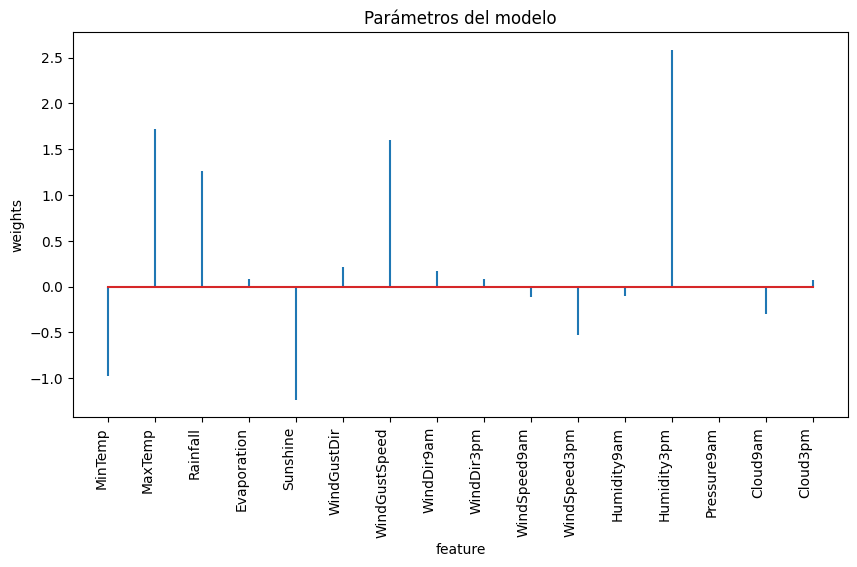

In [ ]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': model.steps[1][1].coef_.flatten()})

fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()


In [ ]:
df_coeficientes

,predictor,coef
0,MinTemp,-0.969993
1,MaxTemp,1.716619
2,Rainfall,1.264059
3,Evaporation,0.079304
4,Sunshine,-1.232639
5,WindGustDir,0.216462
6,WindGustSpeed,1.599833
7,WindDir9am,0.175158
8,WindDir3pm,0.084839
9,WindSpeed9am,-0.113592


In [ ]:
# Predicciones
y_pred = model.predict(X_test)
#predicciones = predicciones.flatten()
#predicciones[:10]
y_pred.shape, y_test.shape

((3008, 1), (3008, 1))

In [ ]:
# Error de test del modelo. Usamos rmse para mantener la misma escala que la variable a predecir

rmse_ols = mean_squared_error(y_test, y_pred, squared = False)

print(f"El error (rmse) de test es: {rmse_ols}")

El error (rmse) de test es: 6.563568070558108


In [ ]:
R2 = metrics.r2_score(y_test, y_pred)
R2

0.23378379137475502

In [ ]:
(y_test - y_pred).shape

(3008, 1)

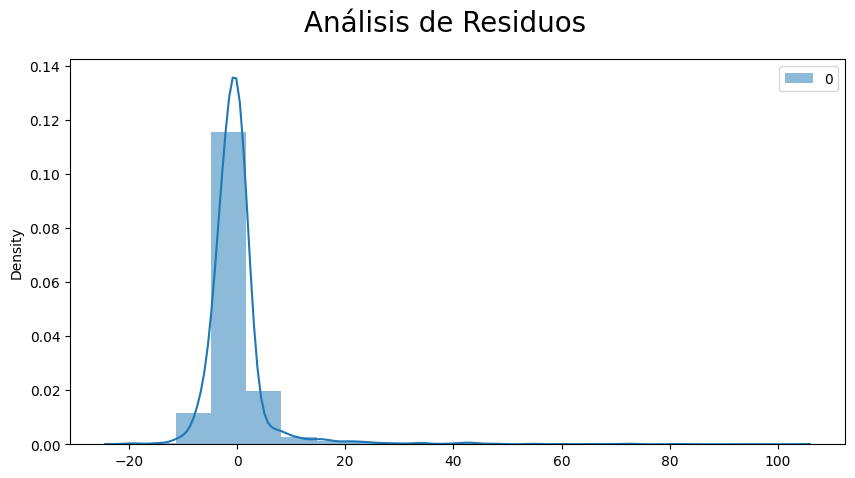

In [ ]:
fig = plt.figure(figsize=(10,5))

sns.histplot((y_test - y_pred), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)
plt.show()

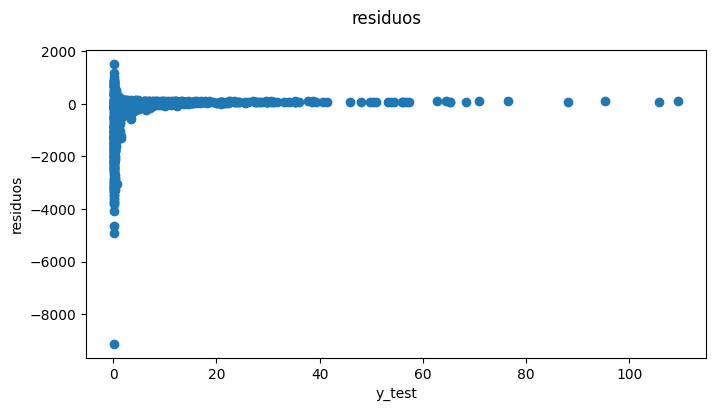

In [ ]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('residuos')
plt.xlabel('y_test')
plt.ylabel('residuos')
plt.scatter(y_test,100*(y_test-y_pred)/y_test)
plt.show()

#Regularización

## Ridge Regression

In [ ]:
# Creación y entrenamiento del modelo. Scikit-Learn usa Cross Validation para encontrar el valor óptimo de alpha
# (lambda en los desarrollos de teoría). Puede ser problemático con series de tiempo.

modelo = make_pipeline(StandardScaler(),
                        RidgeCV(
                           alphas          = np.logspace(-10, 10, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

_ = modelo.fit(X_train, y_train)

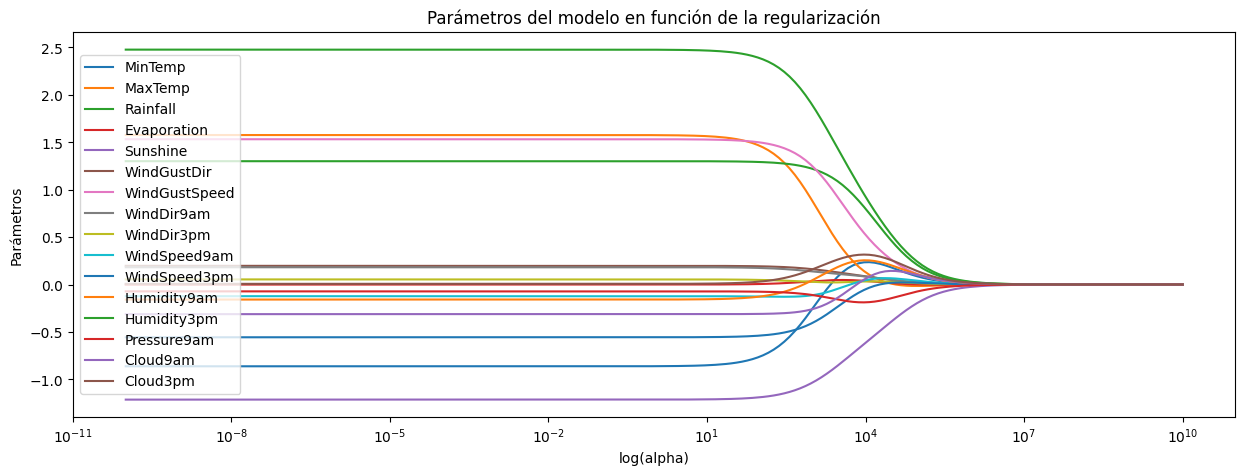

In [ ]:
# Evolución de los parámetros en función de alpha

alphas = modelo.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

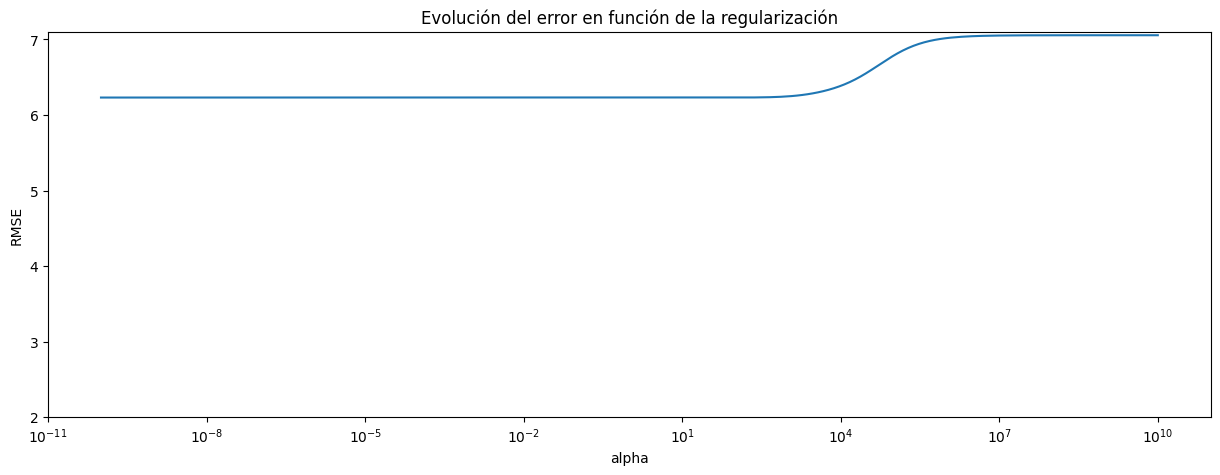

In [ ]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mod = modelo.steps[1][1]

mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [ ]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 22.73965752357932


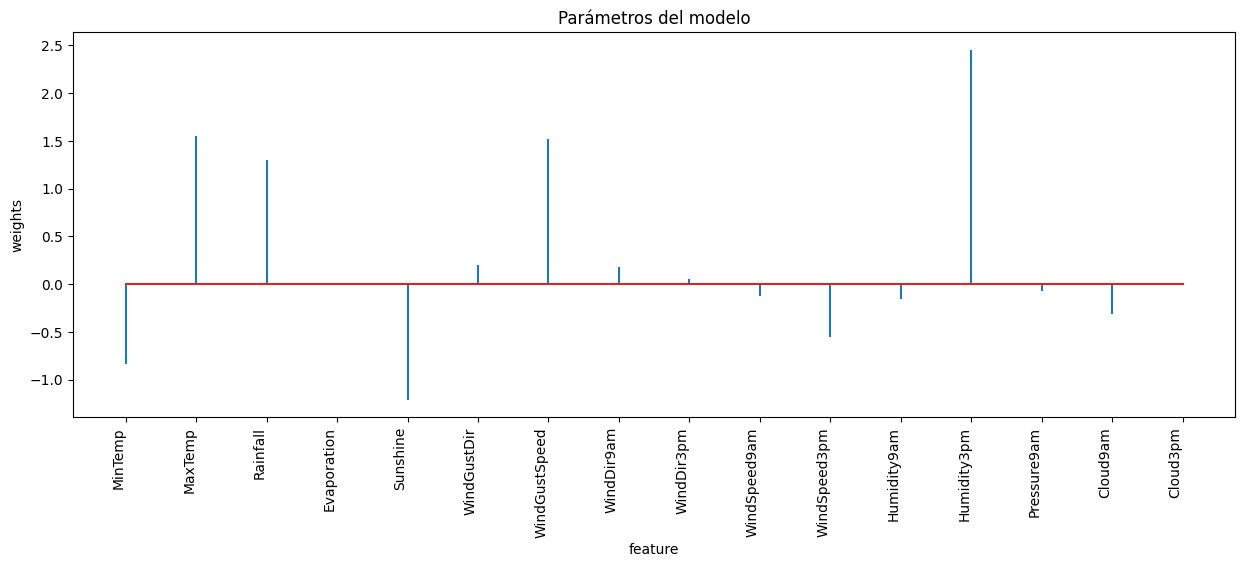

In [ ]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

In [ ]:
# Predicciones test
y_pred = modelo.predict(X_test)

In [ ]:
# Error de test del modelo

rmse_ridge = mean_squared_error(y_test,
                y_pred,
                squared = False
             )

print(f"El error (rmse) de test es: {rmse_ridge}")

El error (rmse) de test es: 7.310456449243811


In [ ]:
R2 = metrics.r2_score(y_test, y_pred)
R2

0.22045639309155318

## Lasso Regression

In [ ]:
modelo = make_pipeline(StandardScaler(),
                        LassoCV(
                           alphas=np.logspace(-10, 10, 200),
                           cv=10
                        )
         )

_ = modelo.fit(X_train, y_train)

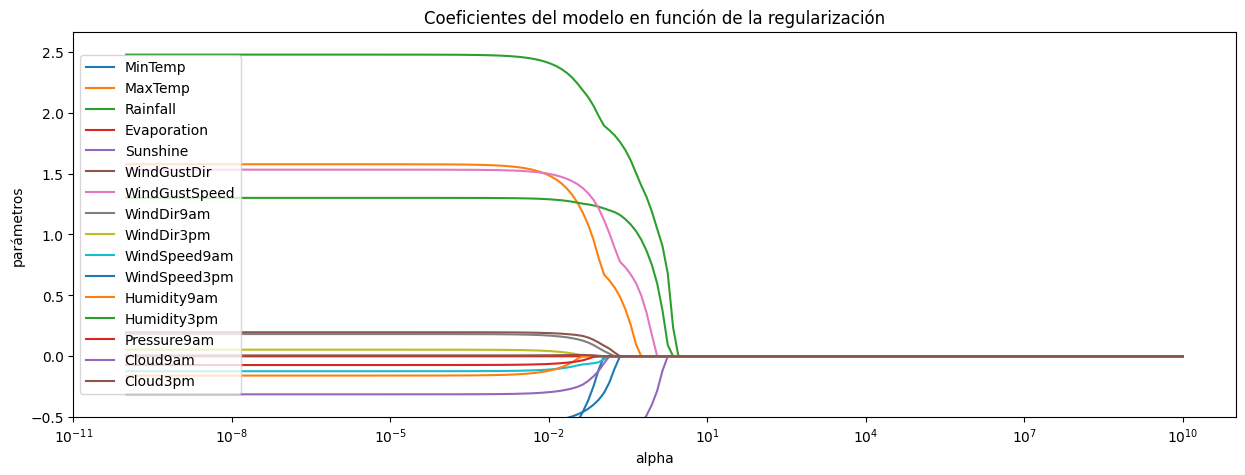

In [ ]:
# Evolución de los parámetros en función de alpha

mod = modelo.steps[1][1]

alphas = mod.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

Text(0.5, 1.0, 'Features incluidas en función de la regularización')

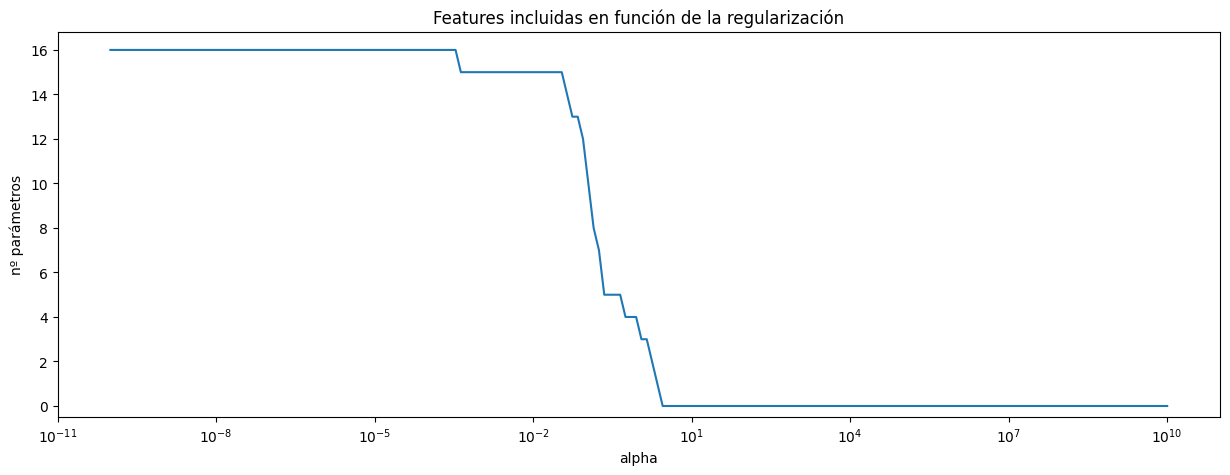

In [ ]:
# Número de features incluidas (parámetros !=0) en función de alpha
alphas = mod.alphas_
n_predictores = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_aux.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

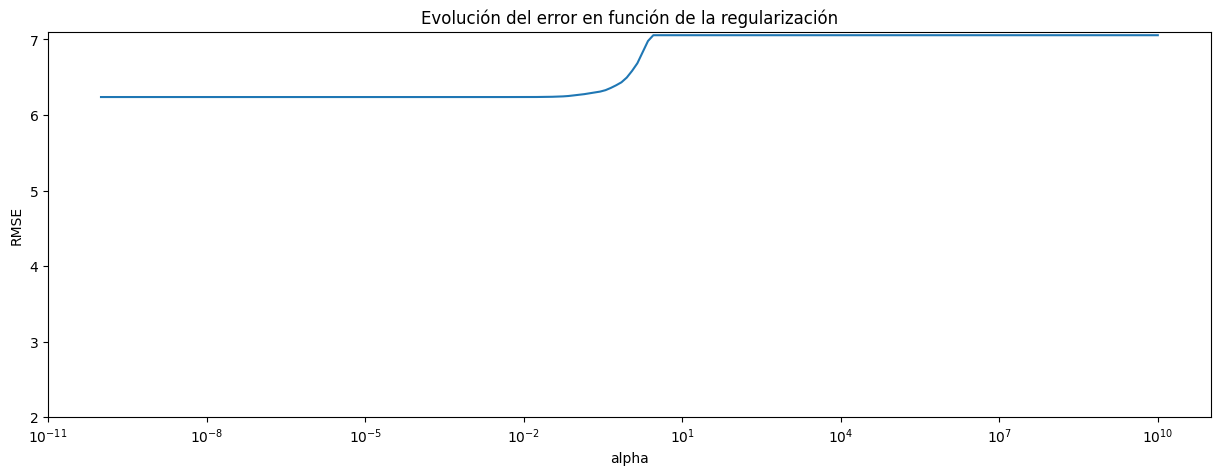

In [ ]:
# Evolución del error de validación cruzada en función de alpha

# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [ ]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 0.005478901179593945


In [ ]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,MinTemp,-0.811665
1,MaxTemp,1.526843
2,Rainfall,1.294616
4,Sunshine,-1.199110
5,WindGustDir,0.193456
6,WindGustSpeed,1.513732
7,WindDir9am,0.175489
8,WindDir3pm,0.047931
9,WindSpeed9am,-0.115510
10,WindSpeed3pm,-0.544381


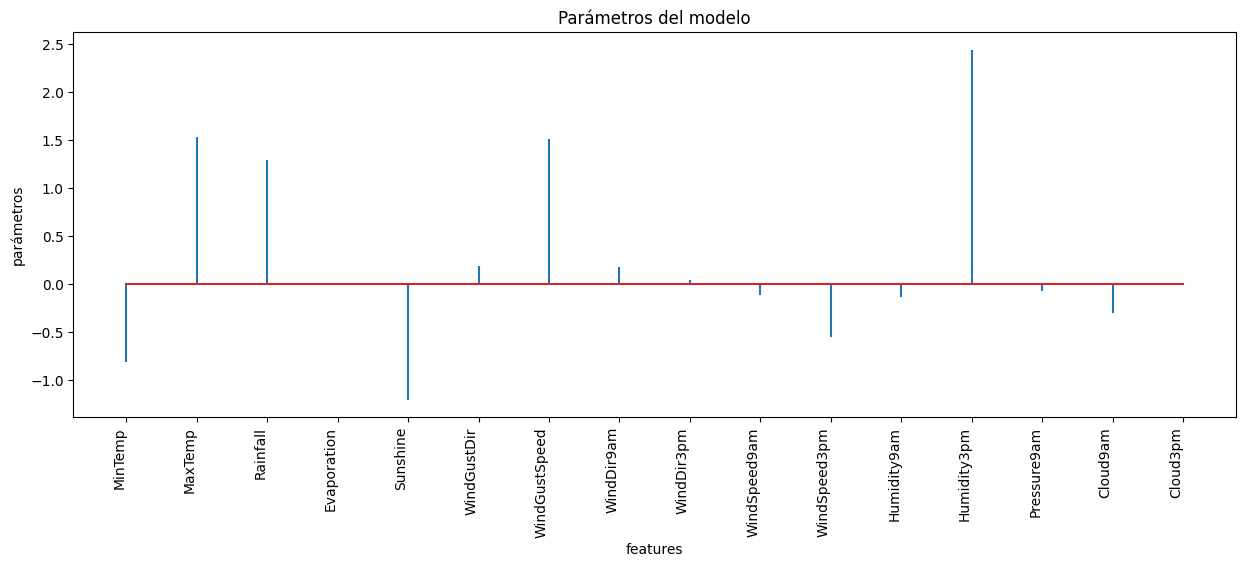

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('features')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
# Error de test del modelo

rmse_lasso = mean_squared_error(y_test,y_pred,squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 7.311248804791948


In [ ]:
R2 = metrics.r2_score(y_test, y_pred)
R2

0.2202873997653162

## ElasticNet

In [ ]:
modelo = make_pipeline(StandardScaler(),
                        ElasticNetCV(
                              l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-10, 10, 200),
                              cv              = 10
                           )
         )

_ = modelo.fit(X_train, y_train)

mod = modelo.steps[1][1]

In [ ]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio
mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

,l1_ratio,mod.alphas_,mse_cv,rmse_cv
1322,0.99,5.478901e-03,38.912276,6.237970
1122,0.95,5.478901e-03,38.912322,6.237974
1323,0.99,4.347013e-03,38.912375,6.237978
922,0.90,5.478901e-03,38.912385,6.237979
1123,0.95,4.347013e-03,38.912416,6.237982
...,...,...,...,...
1027,0.95,1.933892e+07,49.797555,7.056738
1028,0.95,1.534368e+07,49.797555,7.056738
1029,0.95,1.217383e+07,49.797555,7.056738
1023,0.95,4.880252e+07,49.797555,7.056738


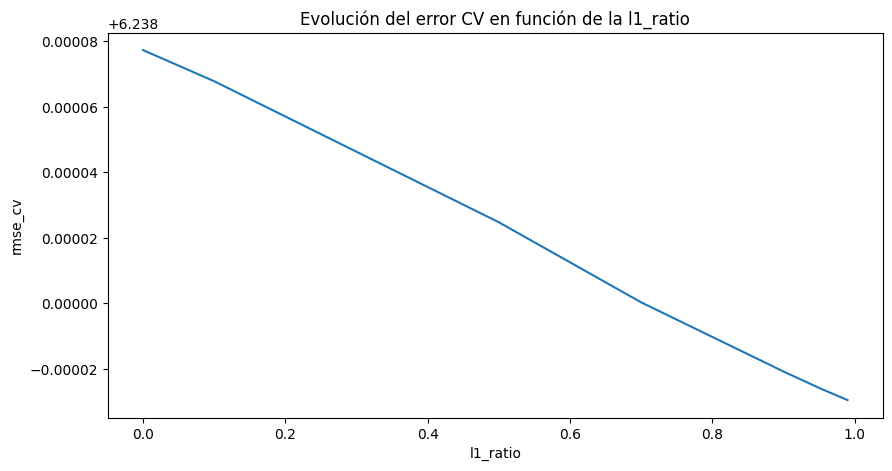

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [ ]:
# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {mod.l1_ratio_}")

Mejor valor de alpha encontrado: 0.005478901179593945
Mejor valor de l1_ratio encontrado: 0.99


In [ ]:
# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

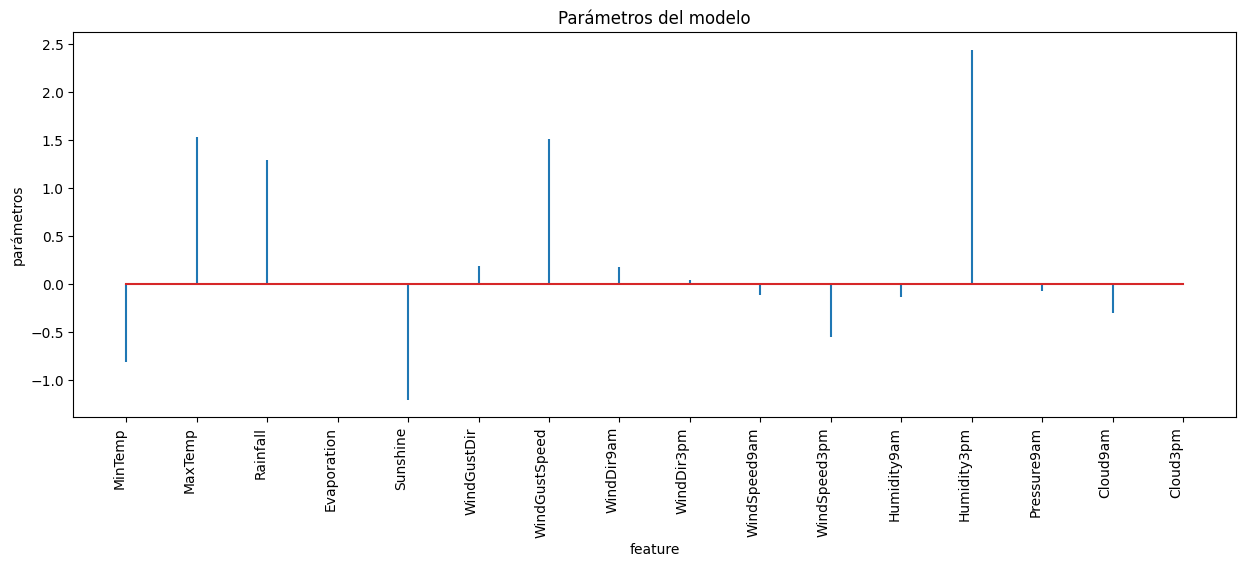

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [ ]:
# Predicciones test
y_pred = modelo.predict(X_test)

In [ ]:
# Error de test del modelo

rmse_elastic = mean_squared_error(y_test,y_pred, squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 7.311259392107769


In [ ]:
R2 = metrics.r2_score(y_test, y_pred)
R2

0.2202851415821394

# Comparación

## RMSE

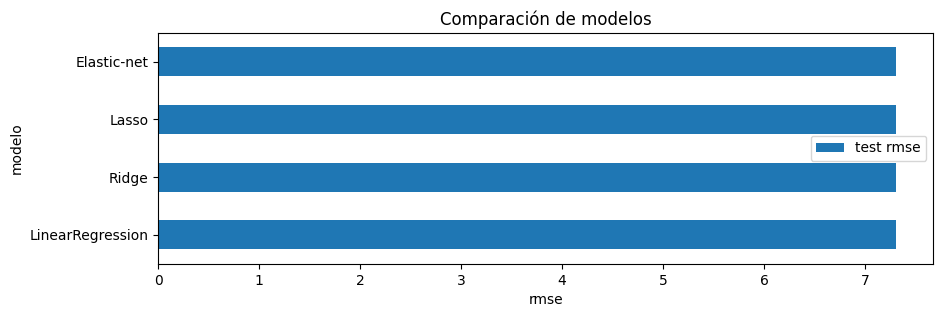

In [ ]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

## MSE

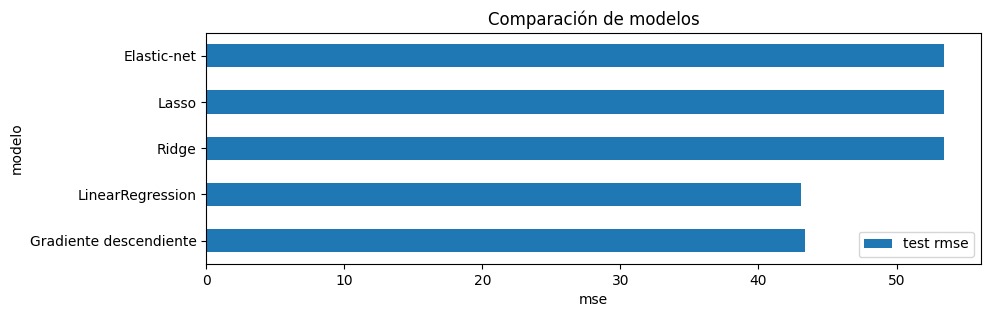

In [ ]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Gradiente descendiente', 'LinearRegression', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [GD_test_err, rmse_ols**2, rmse_ridge**2, rmse_lasso**2, rmse_elastic**2]
                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('mse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');